In [1]:
%matplotlib notebook
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

# Preliminaries!

In [2]:
X = np.loadtxt('../nick/data/design_parameters.dat')
y = np.loadtxt('../nick/data/non_dimensionalized_efficiency.dat')

In [3]:
# Create a polynomial as before
s = Parameter(distribution='uniform', lower=-1., upper=1., order=2)
myparameters = [s for _ in range(0, 25)]

In [4]:
mybasis = Basis('total-order')
mypoly = Poly(parameters=myparameters, basis=mybasis, method='least-squares', \
              sampling_args= {'mesh': 'user-defined', 'sample-points': X, 'sample-outputs': y})
mypoly.set_model()

In [5]:
mysubspace = Subspaces(full_space_poly=mypoly, method='active-subspace')
W = mysubspace.get_subspace()

# Now let's plot!

In [6]:
active_subspace = W[:,0:2]
u = X @ active_subspace 

In [7]:
print(u.shape)

(548, 2)


<IPython.core.display.Javascript object>


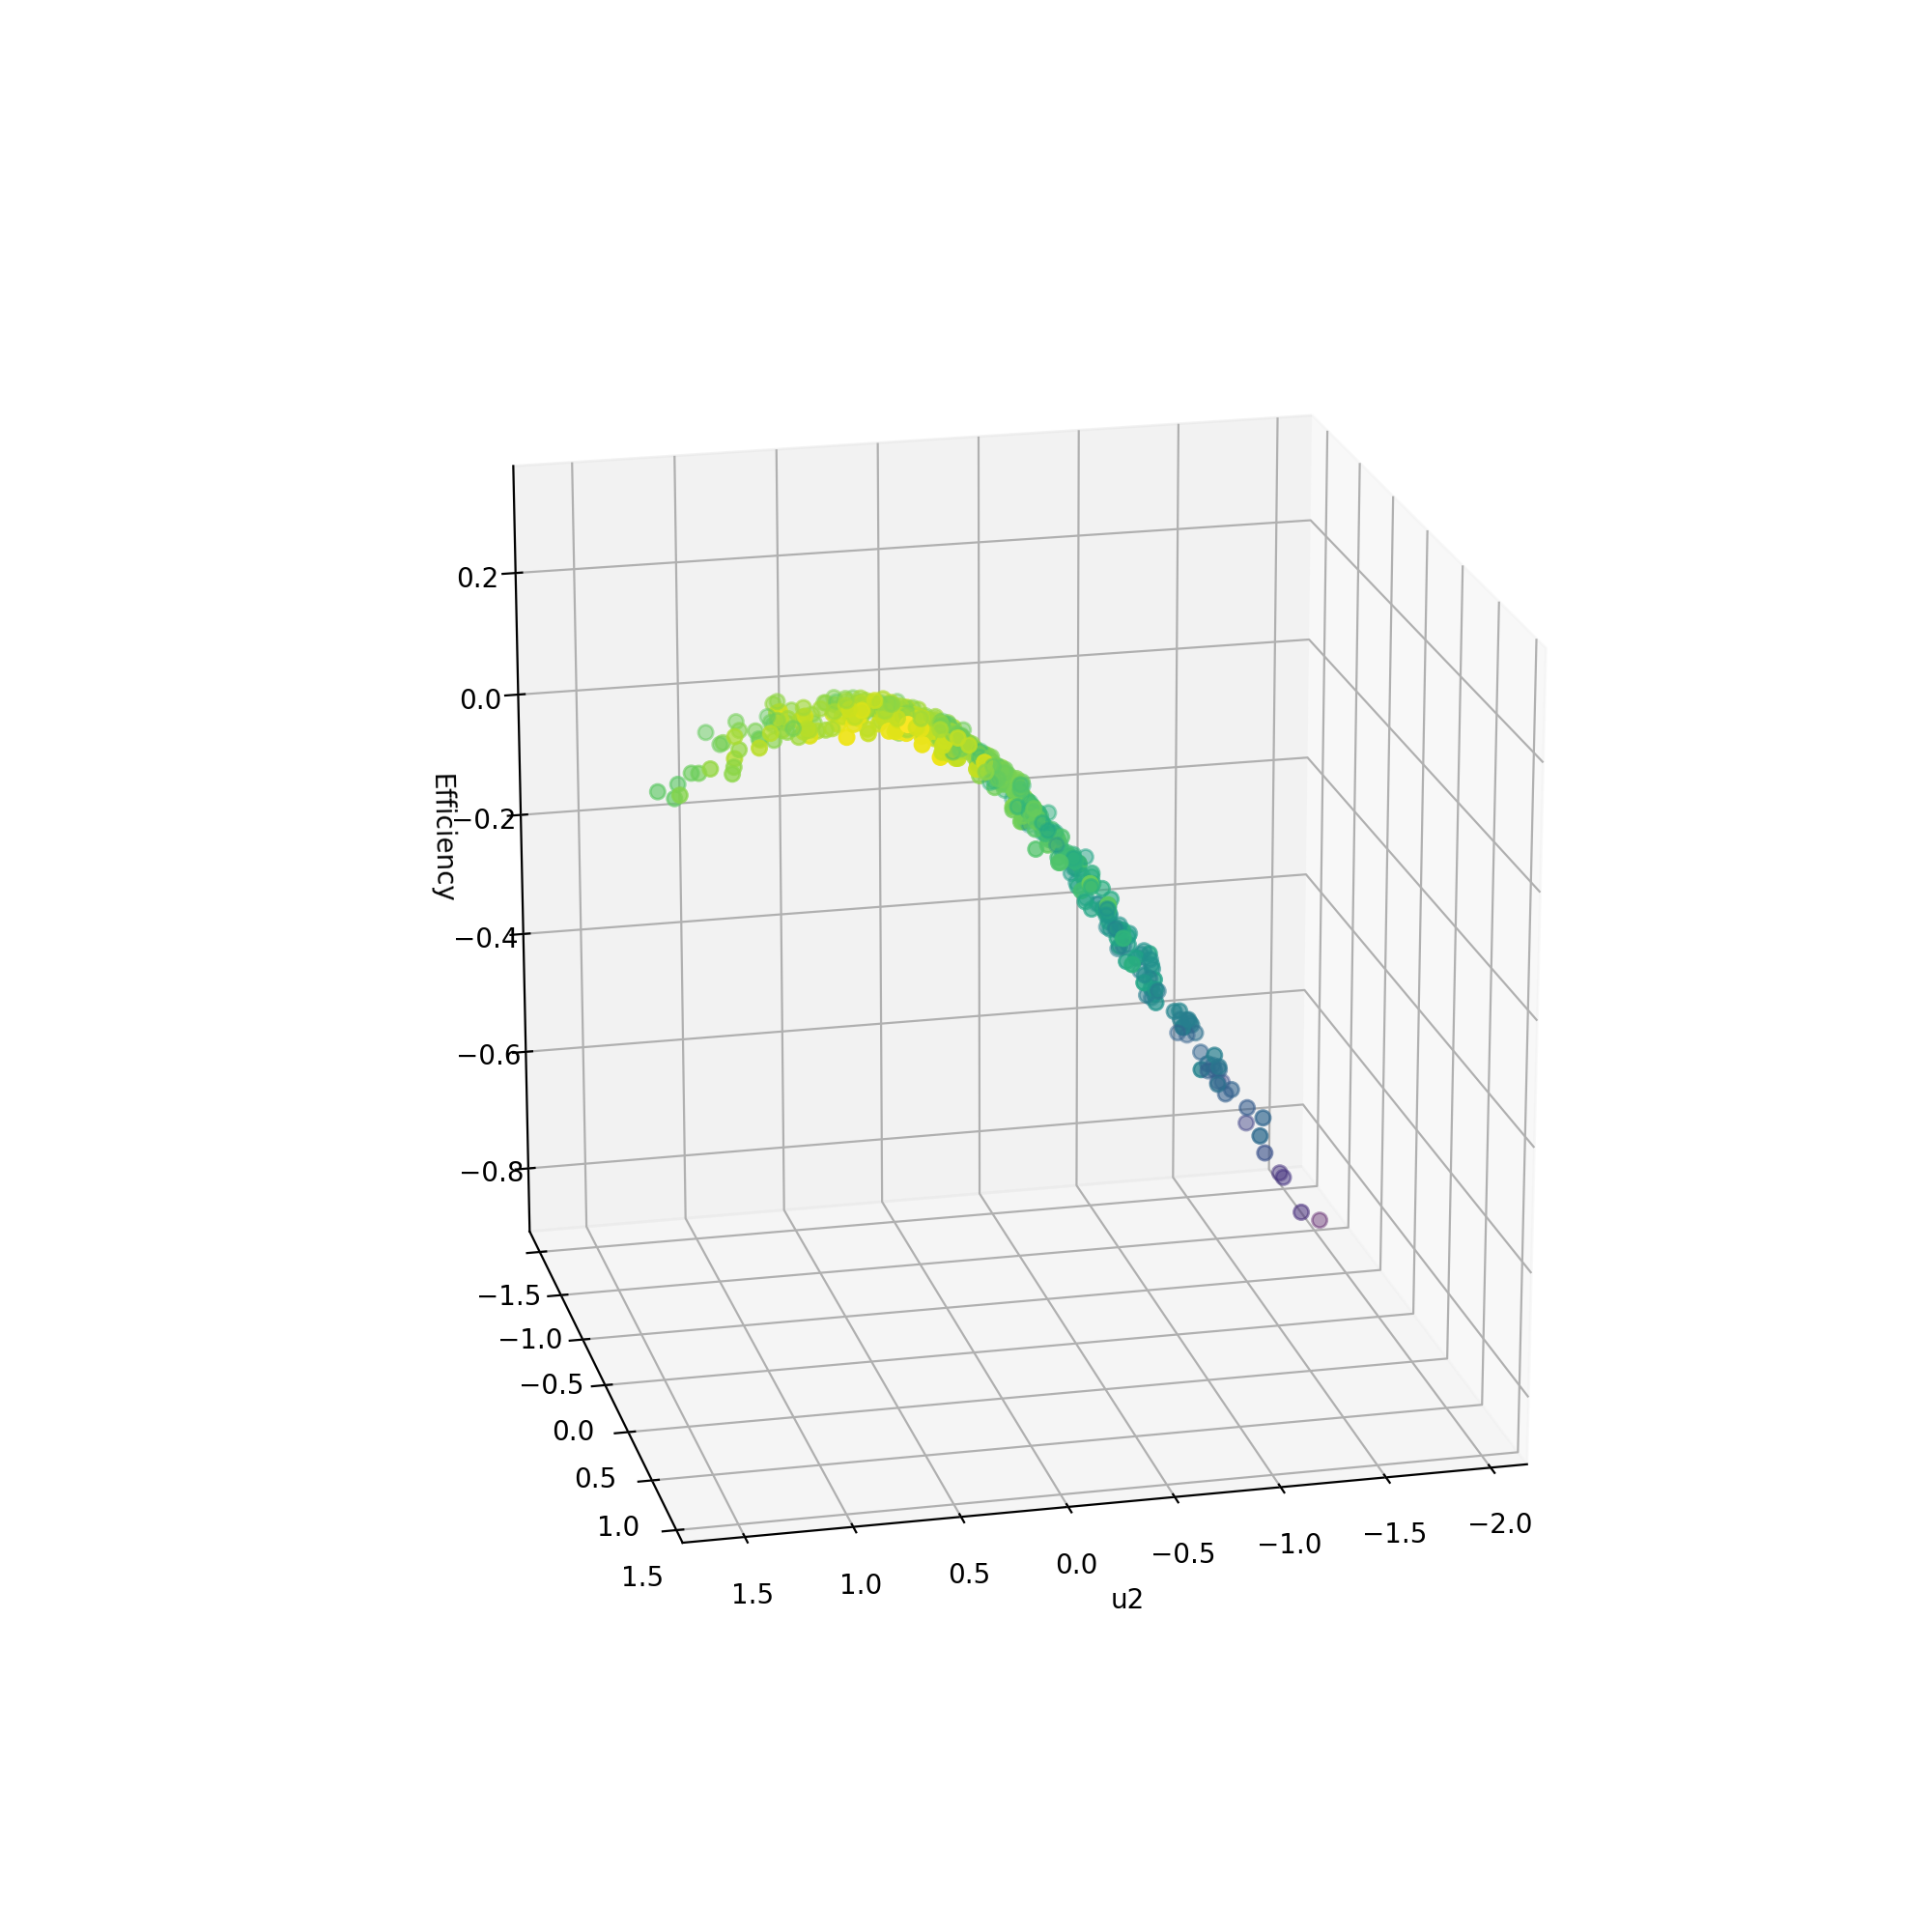

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], y,  s=30, c=y, marker='o')                                                                                
ax.set_xlabel('u1')
ax.set_xlabel('u2')
ax.set_zlabel('Efficiency')
plt.show()

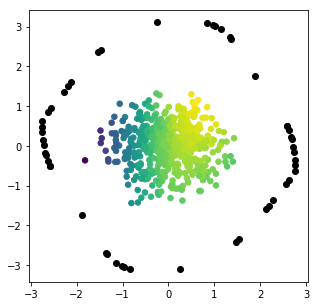

In [19]:
U = mysubspace.get_zonotope_vertices()
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(u[:,0], u[:,1], 30, c=y, marker='o')  
plt.plot(U[:,0], U[:,1], 'ko')
plt.show()